In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [8]:
airline=pd.read_csv('airline_passengers.csv')
airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [9]:
airline.dropna(axis=0,inplace=True)

In [10]:
airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [11]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [12]:
airline['Month']=pd.to_datetime(airline['Month'])

In [13]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [14]:
airline.set_index('Month',inplace=True)

In [15]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

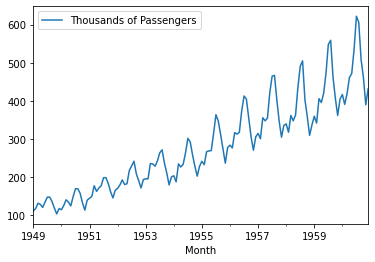

In [16]:
airline.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [31]:
def ad_test(series):
    result=adfuller(series)
    print('ADF stat:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print("strong against null hypothesis,reject,stationary")
    else:
        print('Weak against null hypothesis,accepted,non stationary')

In [32]:
ad_test(airline['Thousands of Passengers'])

ADF stat:0.8153688792060411
p-value:0.9918802434376409
Weak against null hypothesis,accepted,non stationary


In [33]:
#technique differencing
airline['Passenger first difference']=airline['Thousands of Passengers']-airline['Thousands of Passengers'].shift(1)

In [34]:
airline.head(20)

,Thousands of Passengers,Passenger first difference,Passenger second difference,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [35]:
ad_test(airline['Passenger first difference'].dropna())

ADF stat:-2.8292668241699945
p-value:0.05421329028382621
Weak against null hypothesis,accepted,non stationary


In [36]:
airline['Passenger second difference']=airline['Passenger first difference']-airline['Passenger first difference'].shift(1)

In [37]:
ad_test(airline['Passenger second difference'].dropna())

ADF stat:-16.384231542468466
p-value:2.732891850014397e-29
strong against null hypothesis,reject,stationary


<AxesSubplot:xlabel='Month'>

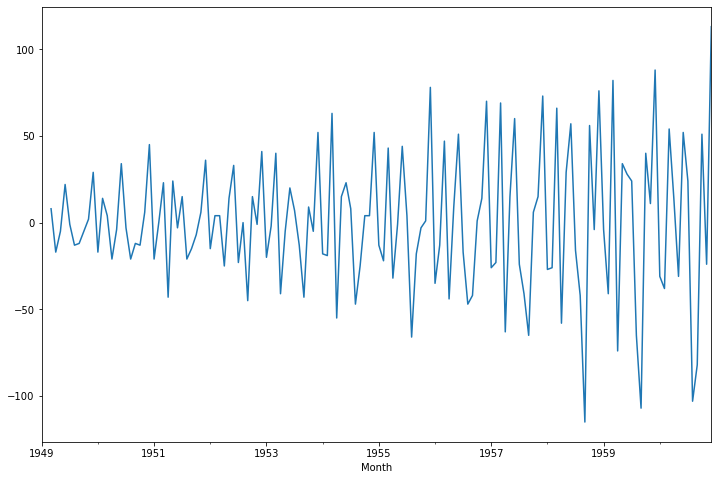

In [38]:
airline['Passenger second difference'].plot(figsize=(12,8))

In [28]:
airline['Passenger 12 difference']=airline['Thousands of Passengers']-airline['Thousands of Passengers'].shift(12)

In [29]:
ad_test(airline['Passenger 12 difference'].dropna())

ADF stat:0.011551493085514952
p-value:0.011551493085514952
strong against null hypothesis,reject,stationary


<AxesSubplot:xlabel='Month'>

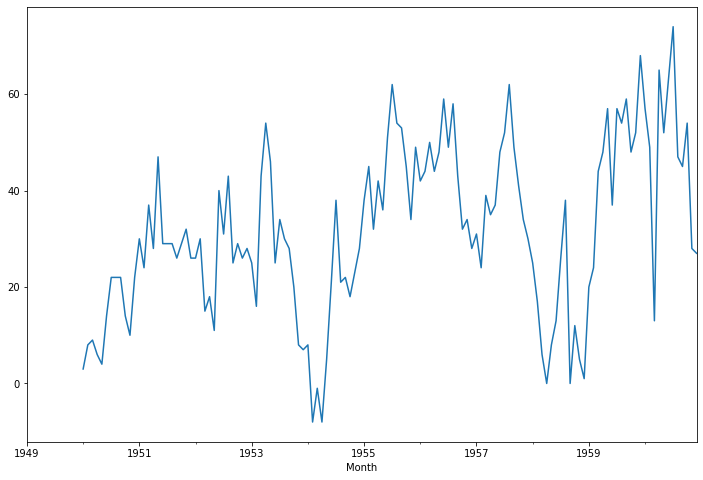

In [30]:
airline['Passenger 12 difference'].plot(figsize=(12,8))

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

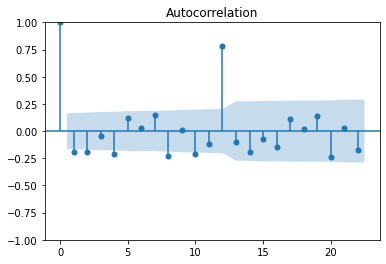

In [41]:
acf=plot_acf(airline['Passenger second difference'].dropna())

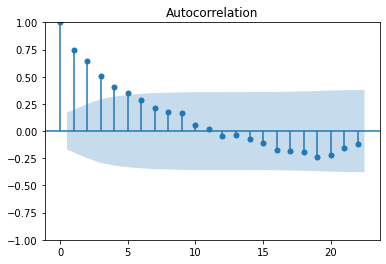

In [42]:
acf=plot_acf(airline['Passenger 12 difference'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


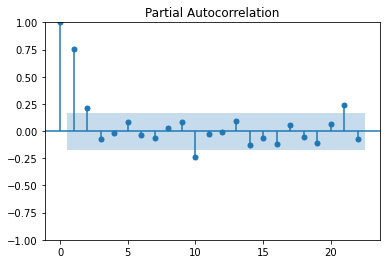

In [43]:
acf=plot_pacf(airline['Passenger 12 difference'].dropna())

In [44]:
from datetime import datetime,timedelta
train_data_end=datetime(1955,12,1)
test_data_end=datetime(1960,12,1)

In [45]:
train_data=airline[:train_data_end]
test_data=airline[train_data_end+timedelta(days=1):test_data_end]

In [46]:
#prediction

pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [47]:
test_data

,Thousands of Passengers,Passenger first difference,Passenger second difference,Passenger 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [48]:
###### ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA

In [49]:
train_data

,Thousands of Passengers,Passenger first difference,Passenger second difference,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [50]:
model_arima=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
model_arima_fit=model_arima.fit()

In [63]:
forc=model_arima_fit.forecast(steps=1000)
res=test_data['Thousands of Passengers']-forc
res

1956-01-01   -16.183614
1956-02-01   -32.478357
1956-03-01     0.556986
1956-04-01     5.172458
1956-05-01    -0.544233
                ...    
2038-12-01          NaN
2039-01-01          NaN
2039-02-01          NaN
2039-03-01          NaN
2039-04-01          NaN
Length: 1000, dtype: float64

In [60]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Thu, 15 May 2025   AIC                            736.477
Time:                             09:55:59   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [87]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [88]:
residuals

Month
1956-01-01    -16.183614
1956-02-01    -32.478357
1956-03-01      0.556986
1956-04-01      5.172458
1956-05-01     -0.544233
1956-06-01     25.077916
1956-07-01     46.979709
1956-08-01     58.432463
1956-09-01     22.879032
1956-10-01     -1.734753
1956-11-01    -40.623911
1956-12-01    -33.828198
1957-01-01    -34.840409
1957-02-01    -55.098236
1957-03-01      5.312173
1957-04-01     -2.080463
1957-05-01     -6.157694
1957-06-01     40.783480
1957-07-01     82.680621
1957-08-01     94.147418
1957-09-01     39.889904
1957-10-01     -9.108924
1957-11-01    -66.293791
1957-12-01    -49.323600
1958-01-01    -52.077843
1958-02-01    -73.405853
1958-03-01    -26.404581
1958-04-01    -43.572858
1958-05-01    -39.448084
1958-06-01     21.744310
1958-07-01     80.146579
1958-08-01     97.329454
1958-09-01      1.513664
1958-10-01    -47.089149
1958-11-01   -108.125318
1958-12-01    -89.012381
1959-01-01    -69.205587
1959-02-01    -85.352234
1959-03-01    -22.150990
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

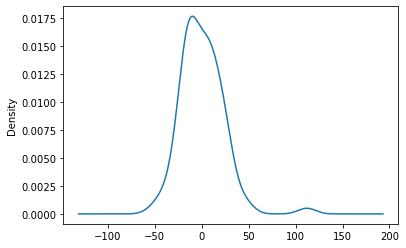

In [92]:
model_arima_fit.resid.plot(kind='kde')

In [93]:
test_data['Pred_arima']=pred

C:\Users\91974\AppData\Local\Temp\ipykernel_17204\77130424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Pred_arima']=pred


In [83]:
###### SARIMA MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
model_sarimax=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [85]:
model_sari_fit=model_sarimax.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
model_sari_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.917
Date:                              Wed, 14 May 2025   AIC                            549.833
Time:                                      17:04:05   BIC                            574.876
Sample:                                  01-01-1949   HQIC                           559.803
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5506      2.810      0.196      0.845      -4.956       6.057
ar.L2          0.8494      0.355      2.394      0.017       0.154       1.545
ar.L3         -0.4110      2.566     -0.160      0.873      -5.439       4.617
ma.L1          0.2072      2.726      0.076      0.939      -5.137       5.551
ma.L2         -0.5079      2.035     -0.250      0.803      -4.496       3.480
ma.L3         -0.0933      0.603     -0.155      0.877      -1.276       1.089
ma.L4         -0.1887      0.441     -0.427      0.669      -1.054       0.676
ma.L5          0.1704      0.764      0.223      0.824      -1.327       1.668
ar.S.L12      -0.3193      0.862     -0.371      0.711      -2.008       1.369
ma.S.L12       0.1114      0.948      0.118      0.906      -1.747       1.970
sigma2        84.1352     30.158      2.790      0.005      25.026     143.245
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.94   Prob(JB):                         0.38
Heteroskedasticity (H):               2.42   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
pred1=model_sari_fit.predict(start=pred_start_date,end=pred_end_date)


<AxesSubplot:xlabel='Month'>

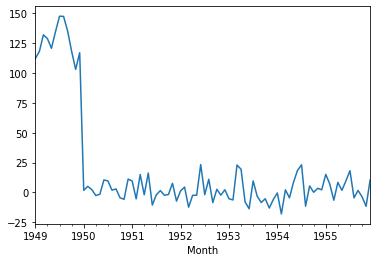

In [104]:
model_sari_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

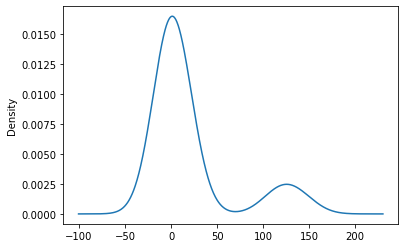

In [105]:
model_sari_fit.resid.plot(kind='kde')

In [107]:
test_data['Predicted_SARIMA']=pred1

C:\Users\91974\AppData\Local\Temp\ipykernel_17204\875161322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred1


In [108]:
test_data

,Thousands of Passengers,Passenger first difference,Passenger second difference,Passenger 12 difference,Pred_arima,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183614,286.197064
1956-02-01,277.0,-7.0,-13.0,44.0,309.478357,281.286088
1956-03-01,317.0,40.0,47.0,50.0,316.443014,309.930545
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542,310.693834
1956-05-01,318.0,5.0,9.0,48.0,318.544233,311.346069
1956-06-01,374.0,56.0,51.0,59.0,348.922084,354.965320
1956-07-01,413.0,39.0,-17.0,49.0,366.020291,403.409907
1956-08-01,405.0,-8.0,-47.0,58.0,346.567537,385.086403
1956-09-01,355.0,-50.0,-42.0,43.0,332.120968,349.458137


<AxesSubplot:xlabel='Month'>

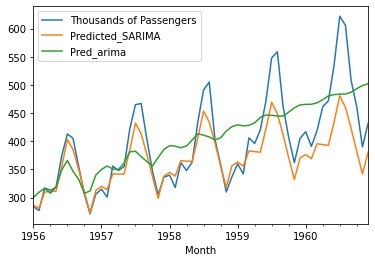

In [111]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Pred_arima']].plot()

In [73]:
from pandas.tseries.offsets import DateOffset
future_dates=[airline.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [75]:
future_airlines=pd.DataFrame(index=future_dates[1:],columns=airline.columns)

In [76]:
future_airlines.tail()

,Thousands of Passengers,Passenger first difference,Passenger second difference,Passenger 12 difference
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [77]:
airline.tail()

,Thousands of Passengers,Passenger first difference,Passenger second difference,Passenger 12 difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [78]:
future_airlines=pd.concat([airline,future_airlines])

In [79]:
future_airlines

,Thousands of Passengers,Passenger first difference,Passenger second difference,Passenger 12 difference
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

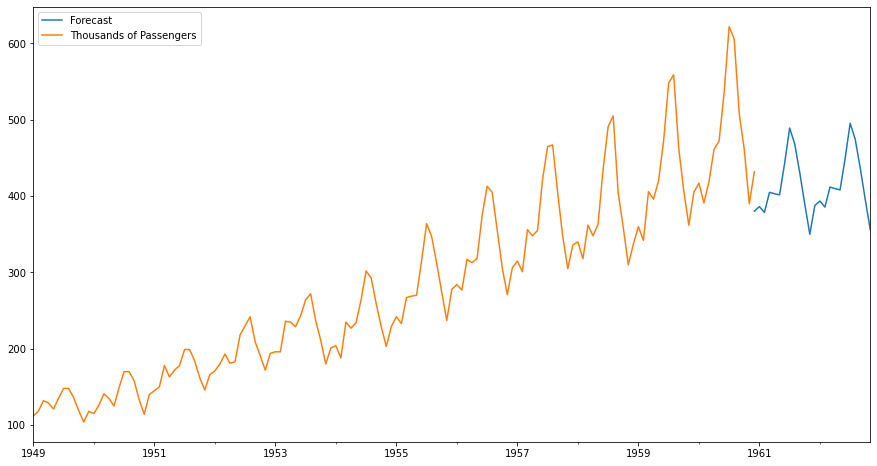

In [88]:
future_airlines['Forecast']=model_sari_fit.predict(start='1960-12-01',end='1962-11-01',dynamic=True)
future_airlines[['Forecast','Thousands of Passengers']].plot(figsize=(15,8))

<AxesSubplot:>

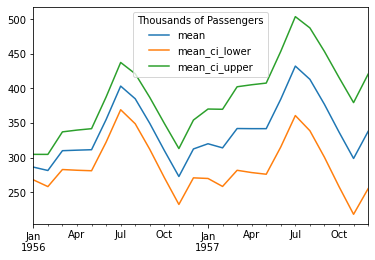

In [95]:
forecast = model_sari_fit.get_forecast(steps=24)
forecast_df = forecast.summary_frame()
forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']].plot()
"""
mean_ci means the upper and lower bounds

"""